## Observations and Insights 

Given the summary statistics, I can see why Capomulin and Ramicane would be of interest. The other two don't really seem that far off the placebo or the other regimens. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

dfmouse = mouse_metadata.merge(study_results,how = 'inner', on = "Mouse ID")
print(dfmouse)

# Display the data table for preview


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the number of mice.
uniqueMouse = dfmouse['Mouse ID'].nunique()
print(uniqueMouse)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

pd.concat(g for _, g in dfmouse.groupby(["Mouse ID","Timepoint"]) if len(g) > 1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dfmouse.loc[dfmouse['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dfmouse.drop(dfmouse.index[dfmouse['Mouse ID']== 'g989'],inplace = True)


In [6]:
# Checking the number of mice in the clean DataFrame.
uniqueMouse2 = dfmouse['Mouse ID'].nunique()

print(uniqueMouse2)


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# print(dfmouse)

tumor_weightmn = dfmouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tumor_weightmed = dfmouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_weightvar = dfmouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tumor_weightstd = dfmouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tumor_weightsem = dfmouse.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

sumgroup = [tumor_weightmn,tumor_weightmed,tumor_weightvar,tumor_weightstd,tumor_weightsem]

tumor_join = pd.concat(sumgroup, axis = 1)
tumor_join.columns = ["Mean","Median","Variance","Standard Deviation","SEM"]


print(tumor_join)


 

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_group = dfmouse.groupby('Drug Regimen')

tumor_data = drug_group.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]}) 

tumor_data.columns = ["Mean","Median","Variance","Standard Deviation","SEM"]

print(tumor_data)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints by Drug'}, xlabel='Drug Regimen', ylabel='Timepoints'>

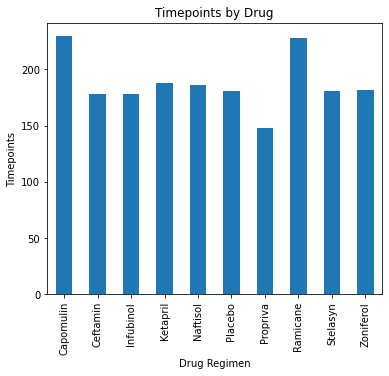

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

dftimeplot = dfmouse.groupby(['Drug Regimen'])['Timepoint'].count()

dftimeplot.plot(kind='bar', title='Timepoints by Drug', ylabel='Timepoints',
         xlabel='Drug Regimen', figsize=(6, 5))


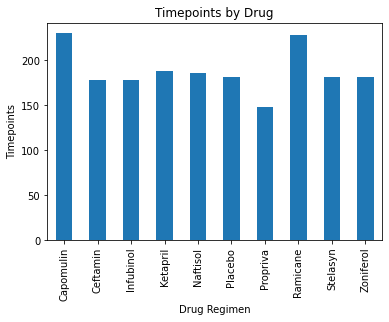

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

dftimeplot = dfmouse.groupby(['Drug Regimen'])['Timepoint'].count()

dftimeplot.plot(kind='bar' , title ="Timepoints by Drug" , xlabel ='Drug Regimen', ylabel='Timepoints');



dfpie


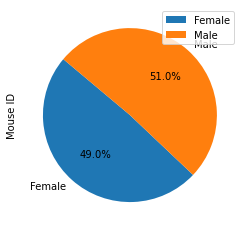

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# dfmousepie = dfmouse.groupby("Sex").count()

dfpie = dfmouse.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID',startangle=140,autopct='%1.1f%%')

print('dfpie')

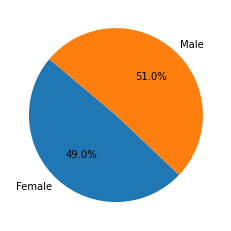

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


dfpie = dfmouse.groupby(['Sex'])['Mouse ID'].count()

plt.pie(dfpie, labels = ['Female','Male'],autopct='%1.1f%%',startangle=140)


plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

dflasttime = dfmouse.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

dfmouse2 = dfmouse.merge(dflasttime,how = 'inner', on = ["Mouse ID","Timepoint"] )

dfmouse3 = dfmouse2[(dfmouse2["Drug Regimen"]=="Capomulin")| (dfmouse2["Drug Regimen"]=="Ramicane") | (dfmouse2["Drug Regimen"]=="Infubinol")| (dfmouse2["Drug Regimen"]=="Ceftamin")]

dfmouse3.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# print(list_of_treatments)

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_vol = dfmouse3.loc[dfmouse3["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(last_vol)
    
    # Determine outliers using upper and lower bounds
    qs = last_vol.quantile([.25,.5,.75])
    lower = qs[.25]
    upper = qs[.75]
    interquartile = upper-lower
    lowerbnd = lower - (1.5*interquartile)
    upperbnd = upper + (1.5*interquartile)
    outs = last_vol.loc[(last_vol < lowerbnd) | (last_vol > upperbnd)]
    print(f"{treatment}'s potential outliers: {outs}]")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)]
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)]


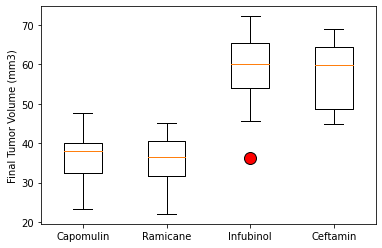

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

orange_out = dict(markerfacecolor = 'red',markersize = 12)
plt.boxplot(tumor_vol, labels = treatments, flierprops = orange_out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouseline = dfmouse.loc[(dfmouse['Drug Regimen']=="Capomulin")&(dfmouse['Mouse ID']=="s185")]

mouseline.plot("Timepoint","Tumor Volume (mm3)")

# mouseline.head()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plotmouse = dfmouse.loc[(dfmouse['Drug Regimen']=="Capomulin")]

tumave = plotmouse.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

plotmouse2 = pd.DataFrame({'Weight (g)':tumave.index, 'Average Tumor Volume (mm3)':tumave.values})

plotmouse2.plot.scatter(x = 'Average Tumor Volume (mm3)', y = 'Weight (g)');

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plotmouse2.corr(method='pearson', min_periods=1)


In [ ]:
#tumave.index = weight, tumave.values = average tumor weight

tumave = plotmouse.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

st.linregress(x = tumave.index,y = tumave.values)